In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/wine_data_2017.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189268 entries, 0 to 189267
Data columns (total 10 columns):
country        189205 non-null object
description    189268 non-null object
designation    133039 non-null object
points         189268 non-null int64
price          174137 non-null float64
province       189205 non-null object
region_1       157846 non-null object
region_2       76607 non-null object
variety        189268 non-null object
winery         189268 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 14.4+ MB


In [6]:
df_new = df.drop_duplicates()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128137 entries, 0 to 189231
Data columns (total 10 columns):
country        128081 non-null object
description    128137 non-null object
designation    89997 non-null object
points         128137 non-null int64
price          118285 non-null float64
province       128081 non-null object
region_1       107049 non-null object
region_2       51680 non-null object
variety        128137 non-null object
winery         128137 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 10.8+ MB


In [65]:
df_new.to_csv('eda/wine_no_dupes.csv')

In [7]:
#Region_1 region/valley of the wine
region1 = df_new.groupby('region_1')
region1.count().head()

,country,description,designation,points,price,province,region_2,variety,winery
region_1,,,,,,,,,
Abruzzo,6,6,5,6,5,6,0,6,6
Adelaida District,97,97,77,97,97,97,97,97,97
Adelaide,29,29,26,29,29,29,0,29,29
Adelaide Hills,119,119,72,119,118,119,0,119,119
Adelaide Plains,2,2,0,2,2,2,0,2,2


In [8]:
#Region_2 applies to US wines only 
region2 = df_new.groupby('region_2')
region2.count()

,country,description,designation,points,price,province,region_1,variety,winery
region_2,,,,,,,,,
California Other,2766,2766,1262,2766,2764,2766,2766,2766,2766
Central Coast,11126,11126,7894,11126,11026,11126,11126,11126,11126
Central Valley,1031,1031,661,1031,1025,1031,1031,1031,1031
Columbia Valley,7995,7995,5317,7995,7945,7995,7995,7995,7995
Finger Lakes,1408,1408,942,1408,1400,1408,1408,1408,1408
Long Island,670,670,440,670,664,670,670,670,670
Mendocino/Lake Counties,2020,2020,1283,2020,2017,2020,2020,2020,2020
Napa,7167,7167,4281,7167,7145,7167,7167,7167,7167
Napa-Sonoma,1268,1268,819,1268,1266,1268,1268,1268,1268


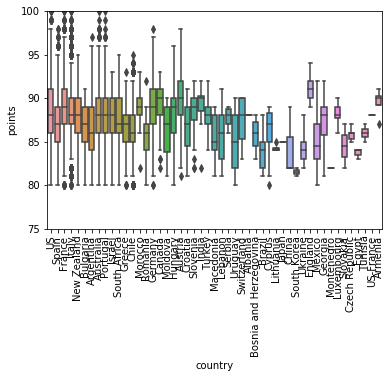

In [9]:
sns.boxplot(x='country', y='points', data=df_new)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ybound(lower=75, upper=100)
plt.show()

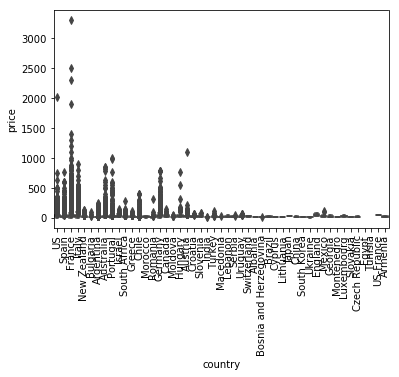

In [22]:
sns.boxplot(x='country', y='price', data=df_new)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

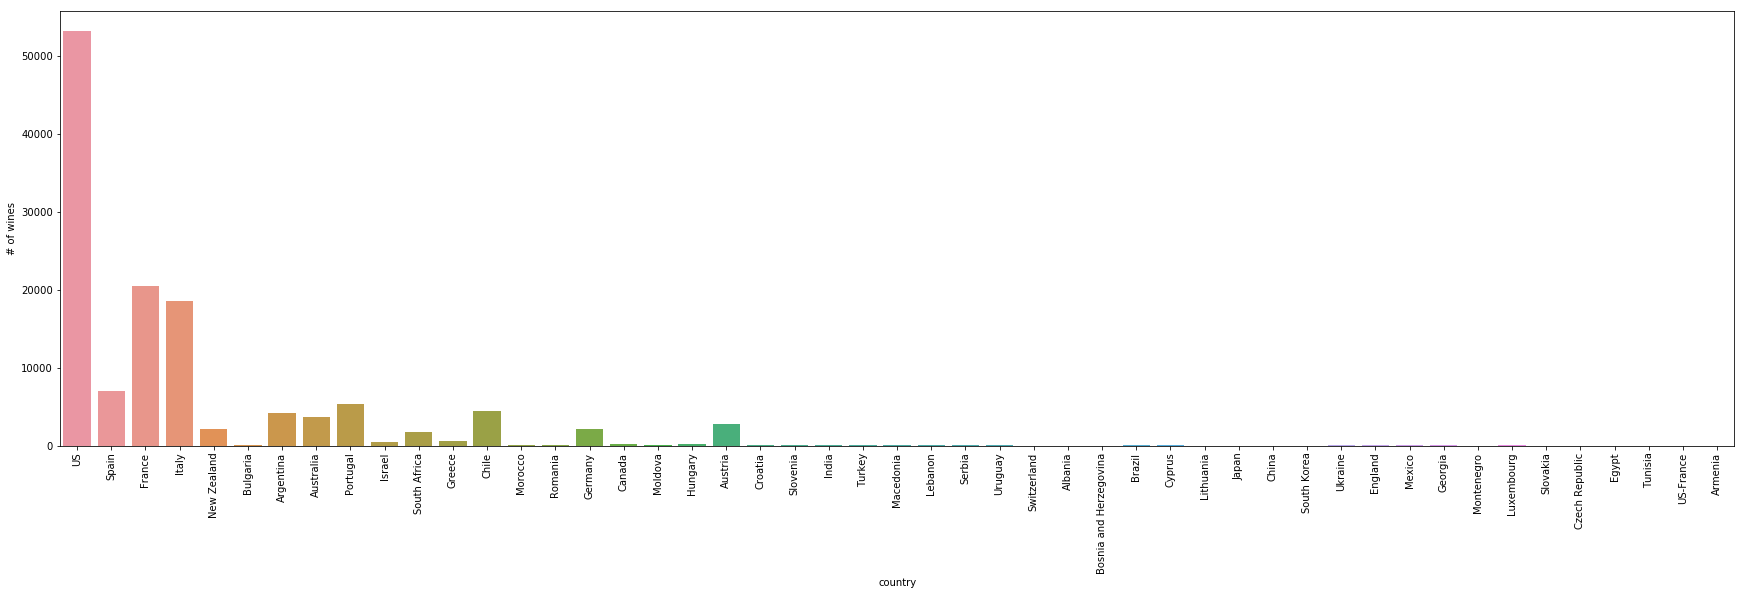

In [10]:
plt.figure(figsize=(30,8))
sns.countplot(x='country', data=df_new)
plt.ylabel('# of wines')
plt.xlabel('country')
plt.xticks(rotation=90)
plt.show()

In [11]:
df_varieties = df_new.groupby(df_new['variety']).count()
df_varieties.count()

country        756
description    756
designation    756
points         756
price          756
province       756
region_1       756
region_2       756
winery         756
dtype: int64

In [12]:
df_new['description']

0         This tremendous 100% varietal wine hails from ...
1         Ripe aromas of fig, blackberry and cassis are ...
2         Mac Watson honors the memory of a wine once ma...
3         This spent 20 months in 30% new French oak, an...
4         This is the top wine from La B̩gude, named aft...
5         Deep, dense and pure from the opening bell, th...
6         Slightly gritty black-fruit aromas include a s...
7         Lush cedary black-fruit aromas are luxe and of...
8         This re-named vineyard was formerly bottled as...
9         The producer sources from two blocks of the vi...
10        Elegance, complexity and structure come togeth...
11        From 18-year-old vines, this supple well-balan...
12        A standout even in this terrific lineup of 201...
13        This wine is in peak condition. The tannins an...
14        With its sophisticated mix of mineral, acid an...
15        First made in 2006, this succulent luscious Ch...
16        This blockbuster, powerhouse o

In [24]:
by_country = df_new.groupby(df_new['country']).count()
by_country

description    49
designation    49
points         49
price          49
province       49
region_1       49
region_2       49
variety        49
winery         49
dtype: int64

In [66]:
df_new[['country','description']].groupby('country').count().nlargest(10, 'description')

,description
country,
US,53206
France,20528
Italy,18550
Spain,7003
Portugal,5275
Chile,4496
Argentina,4184
Australia,3662
Austria,2793


In [67]:
df_new[['variety','description']].groupby('variety').count().nlargest(40, 'description')

,description
variety,
Pinot Noir,12718
Chardonnay,11826
Cabernet Sauvignon,10171
Red Blend,8314
Bordeaux-style Red Blend,6835
Sauvignon Blanc,5159
Riesling,4864
Syrah,4565
Merlot,3722


In [62]:
df_var_ct=df_new[['variety','description']].groupby('variety').count()

In [63]:
df_var_ct.shape

(756, 1)

In [64]:
df_var_ct.to_csv('eda/varieties.csv')

In [57]:
df_new[['country', 'province', 'description']].groupby(['country','province']).count().nlargest(25, 'description')

description
country     province                       
US          California                36890
            Washington                 8526
France      Bordeaux                   5878
Italy       Tuscany                    5842
US          Oregon                     4387
Spain       Northern Spain             4154
France      Burgundy                   4077
Argentina   Mendoza Province           3556
Italy       Piedmont                   3368
            Veneto                     2762
US          New York                   2247
Australia   South Australia            2222
France      Alsace                     2041
Italy       Sicily & Sardinia          2026
France      Loire Valley               1652
Italy       Northeastern Italy         1646
France      Southwest France           1322
Italy       Southern Italy             1254
France      Champagne                  1238
Portugal    Douro                      1179
Spain       Catalonia                  1169
France      Provence                   1097
New Zealand Marlborough                1097
Italy       Central Italy              1070
France      Rh̫ne Valley                939

In [58]:
df_new[['country', 'province', 'variety', 'description']].groupby(['country','province','variety']).count().nlargest(100, 'description')

description
country     province             variety                                   
US          California           Pinot Noir                            6667
                                 Cabernet Sauvignon                    6031
                                 Chardonnay                            5297
France      Bordeaux             Bordeaux-style Red Blend              4588
US          California           Zinfandel                             2858
            Oregon               Pinot Noir                            2373
Italy       Tuscany              Sangiovese                            2292
France      Burgundy             Chardonnay                            2259
Italy       Piedmont             Nebbiolo                              2168
US          California           Syrah                                 2077
Italy       Tuscany              Red Blend                             1830
US          California           Sauvignon Blanc                       1827
France      Burgundy             Pinot Noir                            1700
US          California           Merlot                                1690
                                 Red Blend                             1672
Argentina   Mendoza Province     Malbec                                1440
Spain       Northern Spain       Tempranillo                           1429
US          Washington           Cabernet Sauvignon                    1320
                                 Syrah                                 1183
Italy       Veneto               Corvina, Rondinella, Molinara         1118
France      Bordeaux             Bordeaux-style White Blend             964
US          Washington           Red Blend                              953
France      Champagne            Champagne Blend                        941
US          California           Bordeaux-style Red Blend               917
Italy       Tuscany              Sangiovese Grosso                      869
Portugal    Douro                Portuguese Red                         824
Australia   South Australia      Shiraz                                 769
France      Loire Valley         Sauvignon Blanc                        769
Germany     Mosel                Riesling                               758
US          Washington           Merlot                                 735
...                                                                     ...
            California           Grenache                               302
Argentina   Mendoza Province     Chardonnay                             295
Italy       Veneto               Garganega                              295
New Zealand Marlborough          Pinot Noir                             289
US          California           Sangiovese                             288
Spain       Northern Spain       Garnacha                               285
France      Alsace               Gew�_rztraminer                        276
            Loire Valley         Chenin Blanc                           276
US          California           Riesling                               276
Chile       Maipo Valley         Cabernet Sauvignon                     257
Spain       Northern Spain       Verdejo                                255
                                 Red Blend                              252
US          Washington           Malbec                                 241
France      Champagne            Chardonnay                             238
            Rh̫ne Valley         Syrah                                  238
            Provence             Ros�                                   229
Italy       Sicily & Sardinia    White Blend                            229
Spain       Central Spain        Tempranillo                            229
Portugal    Tejo                 Portuguese Red                         227
France      Languedoc-Roussillon Rh̫ne-style Red Blend                  223
US          Washington           Cab

In [14]:
mask = (df_new['country']=='US')

In [15]:
df_new[mask].count()

country        53206
description    53206
designation    35177
points         53206
price          52925
province       53206
region_1       53028
region_2       51680
variety        53206
winery         53206
dtype: int64

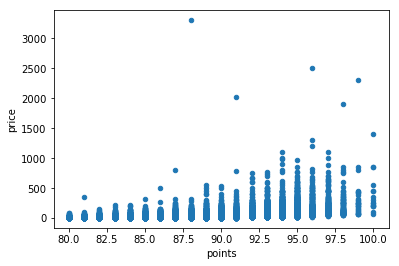

In [18]:
df_new.plot(kind='scatter', x='points', y='price')